<a href="https://colab.research.google.com/github/Herutriana44/machinelearning/blob/master/dicodingsubmission(HERU-TRIANA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
 -O /tmp/rockpaperscissors.zip

--2020-06-16 09:04:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.84MB/s    in 58s     

2020-06-16 09:05:04 (5.29 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
zip_lcl = '/tmp/rockpaperscissors.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()
 
dirbase = '/tmp'
dir_latih = os.path.join(dirbase, 'rockpaperscissors/rps-cv-images')
dir_valid = os.path.join(dirbase, '__MACOSX/rockpaperscissors/rps-cv-images')

In [4]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [5]:
os.listdir('/tmp/__MACOSX/rockpaperscissors/rps-cv-images')

['paper', '._README_rpc-cv-images.txt', 'scissors', 'rock']

In [0]:
latih_batu = os.path.join(dir_latih,'rock')
latih_kertas = os.path.join(dir_latih,'paper')
latih_gunting = os.path.join(dir_latih,'scissors')
batu_valid = os.path.join(dir_valid,'rock')
kertas_valid = os.path.join(dir_valid,'paper')
gunting_valid = os.path.join(dir_valid,'scissors')
dir = os.path.join(dirbase,'rockpaperscissors/rps-cv-images')

In [0]:
data_latih = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')
data_test = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')

In [8]:
generator_latih = data_latih.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=32,
    subset='training',
    class_mode='categorical')
generator_valid = data_test.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=32,
    subset='validation',
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(3,activation='softmax')
  ])

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
mc = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [12]:
history = model.fit(
    generator_latih,
    steps_per_epoch=30,
    epochs=10,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[es,mc])

Epoch 1/10

Epoch 00001: val_accuracy improved from -inf to 0.35625, saving model to model.hdf5
30/30 - 68s - loss: 1.2982 - accuracy: 0.3646 - val_loss: 1.0633 - val_accuracy: 0.3562
Epoch 2/10

Epoch 00002: val_accuracy improved from 0.35625 to 0.75625, saving model to model.hdf5
30/30 - 67s - loss: 0.9153 - accuracy: 0.5741 - val_loss: 0.6859 - val_accuracy: 0.7563
Epoch 3/10

Epoch 00003: val_accuracy improved from 0.75625 to 0.81875, saving model to model.hdf5
30/30 - 71s - loss: 0.5198 - accuracy: 0.8198 - val_loss: 0.4557 - val_accuracy: 0.8188
Epoch 4/10

Epoch 00004: val_accuracy improved from 0.81875 to 0.90625, saving model to model.hdf5
30/30 - 67s - loss: 0.3342 - accuracy: 0.8738 - val_loss: 0.3153 - val_accuracy: 0.9062
Epoch 5/10

Epoch 00005: val_accuracy improved from 0.90625 to 0.92500, saving model to model.hdf5
30/30 - 68s - loss: 0.2782 - accuracy: 0.9062 - val_loss: 0.2251 - val_accuracy: 0.9250
Epoch 6/10

Epoch 00006: val_accuracy did not improve from 0.92500
3

Saving ZCr3PjDcttbKRAAW.png to ZCr3PjDcttbKRAAW.png
ZCr3PjDcttbKRAAW.png
[[0. 0. 1.]]
2
scissors


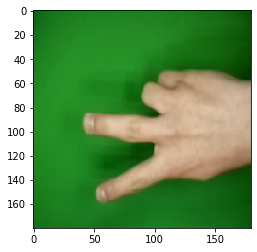

In [29]:
import numpy as nampay
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as pyp
import matplotlib.image as matimg
import matplotlib.pyplot as pyp
import matplotlib.image as matimg
%matplotlib inline
 
uploaded = files.upload()
 
for pimg in uploaded.keys():
 
  # predicting images
  patoh = pimg
  gambar = image.load_img(patoh, target_size=(180,180))
  imgplot = pyp.imshow(gambar)
  x = image.img_to_array(gambar)
  x = nampay.expand_dims(x, axis=0)
 
  foto = nampay.vstack([x])
  classes = model.predict(foto, batch_size=10)
  
  print(pimg)
  kelas = nampay.argmax(classes)
  print(classes)
  print(kelas)
  if kelas==0:
    print('paper')
  elif kelas==1:
    print('rock')
  else:
    print('scissors')